In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv(r"C:\Users\selva\avocado.up.csv",parse_dates=['Date'])
df=df.iloc[:,1:]
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-04-02,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [2]:
# Find the Region and the Average Price
df_13=df.loc[df['Date']<='2017-12-31'].sort_values(by='Date')
cmpr_13=pd.crosstab(df_13['region'],df_13['type'],df_13['AveragePrice'],aggfunc='mean')

In [3]:
# Find the Region and Find the Average Price
df_18=df.loc[df['Date']>'2017-12-31'].sort_values(by='Date')
cmpr_18=pd.crosstab(df_18['region'],df_18['type'],df_18['AveragePrice'],aggfunc='mean')

In [4]:
pd.crosstab(df['region'],df['type'],df['AveragePrice'],aggfunc='mean')

type,conventional,organic
region,,
Albany,1.348757,1.773314
Atlanta,1.068817,1.607101
BaltimoreWashington,1.344201,1.724260
Boise,1.076036,1.620237
Boston,1.304379,1.757396
BuffaloRochester,1.382308,1.651361
California,1.105444,1.685207
Charlotte,1.275089,1.936982
Chicago,1.369349,1.744201


<AxesSubplot:ylabel='region'>

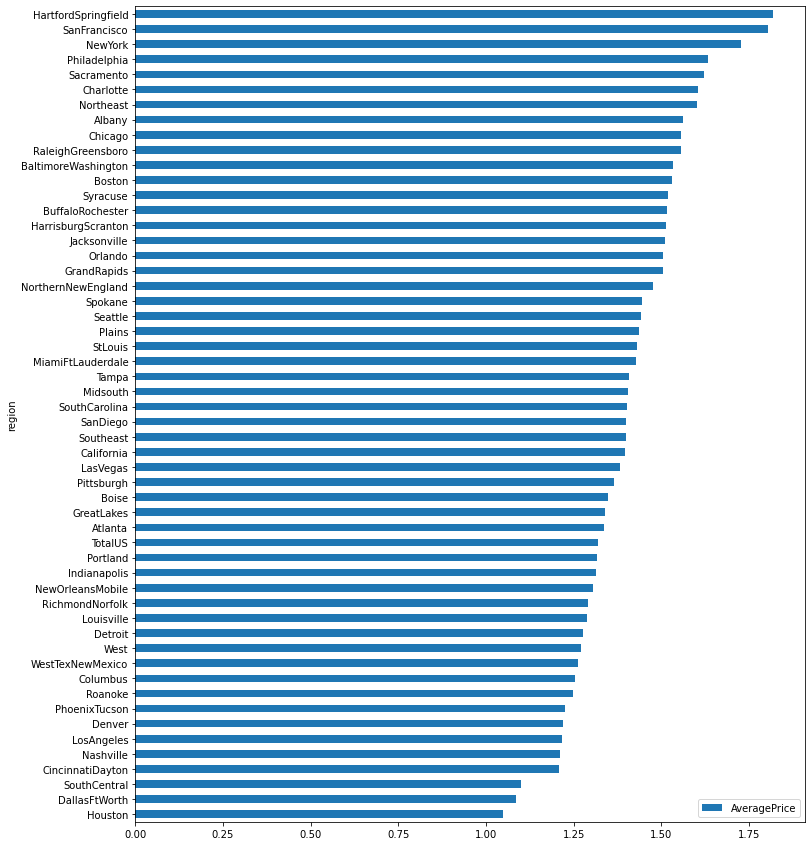

In [5]:
df.groupby(['region']).agg({"AveragePrice":"mean"}).sort_values(by='AveragePrice').plot.barh(figsize=(12,15))

In [6]:
wrk=df.groupby(['region','type'],as_index=False).agg({'AveragePrice':'mean','Total Volume':'mean'}).round(2)

In [7]:
df['Proportion']=(df['Total Bags']/df['Total Volume'])*100
df.round(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Proportion
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,13.54
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,17.32
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,6.89
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,7.36
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,12.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-04-02,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,79.06
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,66.71
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,68.24
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,67.69


In [8]:
df2=df.copy()
df2['4046']=df2['4046']/df2['Total Volume']
df2['4225']=df2['4225']/df2['Total Volume']
df2['4770']=df2['4770']/df2['Total Volume']
df2['Total Bags']=df2['Total Bags']/df2['Total Volume']
df2.round(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Proportion
0,2015-12-27,1.33,64236.62,0.016,0.848,0.001,0.135,8603.62,93.25,0.0,conventional,2015,Albany,13.539
1,2015-12-20,1.35,54876.98,0.012,0.813,0.001,0.173,9408.07,97.49,0.0,conventional,2015,Albany,17.322
2,2015-12-13,0.93,118220.22,0.007,0.923,0.001,0.069,8042.21,103.14,0.0,conventional,2015,Albany,6.890
3,2015-06-12,1.08,78992.15,0.014,0.911,0.001,0.074,5677.40,133.76,0.0,conventional,2015,Albany,7.357
4,2015-11-29,1.28,51039.60,0.018,0.859,0.001,0.121,5986.26,197.69,0.0,conventional,2015,Albany,12.116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-04-02,1.63,17074.83,0.120,0.090,0.000,0.791,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,79.056
18245,2018-01-28,1.71,13888.04,0.086,0.247,0.000,0.667,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,66.711
18246,2018-01-21,1.87,13766.76,0.087,0.178,0.053,0.682,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,68.238
18247,2018-01-14,1.93,16205.22,0.094,0.184,0.045,0.677,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,67.691


In [9]:
wrk=df2.loc[:,['AveragePrice','4046','4225','4770','Total Bags','type']]
wrk=wrk.round(3)
from sklearn.preprocessing import LabelBinarizer
wrk['type']=LabelBinarizer().fit_transform(wrk['type'])
wrk

,AveragePrice,4046,4225,4770,Total Bags,type
0,1.33,0.016,0.848,0.001,0.135,0
1,1.35,0.012,0.813,0.001,0.173,0
2,0.93,0.007,0.923,0.001,0.069,0
3,1.08,0.014,0.911,0.001,0.074,0
4,1.28,0.018,0.859,0.001,0.121,0
...,...,...,...,...,...,...
18244,1.63,0.120,0.090,0.000,0.791,1
18245,1.71,0.086,0.247,0.000,0.667,1
18246,1.87,0.087,0.178,0.053,0.682,1
18247,1.93,0.094,0.184,0.045,0.677,1


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
X=wrk.drop(['type'],axis=1)
y=wrk['type']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print(accuracy_score(pred,y_test))
confusion_matrix(pred,y_test)

0.9533201840894149


array([[2144,  102],
       [ 111, 2206]], dtype=int64)

In [12]:
wrk.corr()

,AveragePrice,4046,4225,4770,Total Bags,type
AveragePrice,1.000000,-0.341852,0.156105,-0.126834,0.172285,0.615845
4046,-0.341852,1.000000,-0.449690,-0.012295,-0.444544,-0.353960
4225,0.156105,-0.449690,1.000000,0.075663,-0.585253,-0.104555
4770,-0.126834,-0.012295,0.075663,1.000000,-0.235136,-0.248890
Total Bags,0.172285,-0.444544,-0.585253,-0.235136,1.000000,0.456613
type,0.615845,-0.353960,-0.104555,-0.248890,0.456613,1.000000


In [13]:
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder
avc=pd.concat([pd.DataFrame(OneHotEncoder().fit_transform(df2['region'][:,np.newaxis]).toarray()),wrk],axis=1)
avc

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,AveragePrice,4046,4225,4770,Total Bags,type
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.33,0.016,0.848,0.001,0.135,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.35,0.012,0.813,0.001,0.173,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.93,0.007,0.923,0.001,0.069,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.08,0.014,0.911,0.001,0.074,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.28,0.018,0.859,0.001,0.121,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.63,0.120,0.090,0.000,0.791,1
18245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.71,0.086,0.247,0.000,0.667,1
18246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.87,0.087,0.178,0.053,0.682,1
18247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.93,0.094,0.184,0.045,0.677,1


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
X=avc.drop(['AveragePrice'],axis=1)
y=avc['AveragePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
reg=RandomForestRegressor()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
r2_score(y_test,y_pred)
#mean_squared_error(y_test,y_pred)

0.7270323450842556

In [15]:
pd.DataFrame([y_test.values,y_pred]).T

,0,1
0,0.82,0.97510
1,0.97,1.29050
2,1.44,1.47990
3,0.97,0.93470
4,1.45,1.46495
...,...,...
6018,1.58,1.47720
6019,1.41,1.36480
6020,1.90,2.33770
6021,1.84,1.79550
